# Predicción Final

In [41]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
import statsmodels.api as sm

#from sklearn.model_selection import train_test_split

from keras.models import load_model


## Cargar Mejor Modelo

In [42]:
# load the saved model
best_model = load_model('best_model_lstm_06_270.h5')

## Cargar grupo de datos de pruebas

In [53]:
vel_viento = [
    3.07, 2.37, 2.05, 2.03, 2.01, 1.86, 1.91, 2.07, 1.89, 1.59,
    1.47, 1.44, 1.39, 1.36, 8.43, 7.77, 6.91, 6.07, 5.51, 5.43,
    5.66, 5.98, 6.18, 6.25, 6.18, 6.02, 5.8, 5.56, 5.31, 4.99,
    4.53, 3.91, 3.25, 2,69, 2.31, 2.08, 1.94, 1.83, 1.78, 1.8,
    1.9, 1.92, 1.63, 1.05, 0.99, 1.53, 1.81, 1.78
]


In [54]:
real = [
    0.8079999999999999, 0.847, 0.846, 0.845, 0.845, 0.8440000000000001, 0.843, 0.8420000000000001, 0.8420000000000001, 0.841,
    0.84, 0.8390000000000001, 0.8390000000000001, 0.838, 0.8270000000000001, 0.812, 0.772, 0.722, 0.586, 0.471,
    0.391, 0.376, 0.415, 0.455, 0.494, 0.5329999999999999, 0.5720000000000001, 0.611, 0.6509999999999999, 0.69,
    0.7290000000000001, 0.768, 0.8079999999999999, 0.847, 0.847, 0.846, 0.846, 0.845, 0.845, 0.845, 
    0.8440000000000001, 0.8440000000000001, 0.843, 0.843, 0.843, 0.8420000000000001, 0.8420000000000001, 0.841
    
    
    
]

In [55]:

data48 = [[
    3.07,0.391,0.376,0.415,0.455,0.494,0.5329999999999999,0.5720000000000001,0.611,0.6509999999999999,
    0.69,0.7290000000000001,0.768,0.8079999999999999,0.847,0.617,0.602,0.546,0.511,0.381,
    0.436,0.496,0.722,0.8370000000000001,0.8320000000000001,0.8320000000000001,0.8270000000000001,0.8270000000000001,0.812,0.772,
    0.722,0.586,0.471,0.391,0.376,0.415,0.455,0.494,0.5329999999999999,0.5720000000000001,
    0.611,0.6509999999999999,0.69,0.7290000000000001,0.768
]]

#0.8079999999999999

data48_2=[[
    2.37,0.376,0.415,0.455,0.494,0.5329999999999999,0.5720000000000001,0.611,0.6509999999999999,0.69,
    0.7290000000000001,0.768,0.8079999999999999,0.847,0.617,0.602,0.546,0.511,0.381,0.436,
    0.496,0.722,0.8370000000000001,0.8320000000000001,0.8320000000000001,0.8270000000000001,0.8270000000000001,0.812,0.772,0.722,
    0.586,0.471,0.391,0.376,0.415,0.455,0.494,0.5329999999999999,0.5720000000000001,0.611,
    0.6509999999999999,0.69,0.7290000000000001,0.768,0.79370826
]]

#0.847



# Datos de Entrada

### Reshape datos de entrada

In [56]:
timesteps=1
data = np.array(data48)
#reshape
data48_re = data.reshape((data.shape[0], timesteps, data.shape[1]))
data48 = data48_re
data48

array([[[3.07 , 0.391, 0.376, 0.415, 0.455, 0.494, 0.533, 0.572, 0.611,
         0.651, 0.69 , 0.729, 0.768, 0.808, 0.847, 0.617, 0.602, 0.546,
         0.511, 0.381, 0.436, 0.496, 0.722, 0.837, 0.832, 0.832, 0.827,
         0.827, 0.812, 0.772, 0.722, 0.586, 0.471, 0.391, 0.376, 0.415,
         0.455, 0.494, 0.533, 0.572, 0.611, 0.651, 0.69 , 0.729, 0.768]]])

In [57]:
pred48=best_model.predict(data48)

In [48]:
#pred_arr = []
#for x in pred48:
#    pred_arr.append(x[0])
#    print(x[0])

## Proceso de Predicción

In [58]:
# cambia valores de arreglo
# Los valores se mueven una posición menos y la predicción queda en la ultima posición

def changeArray(arr,pred):
    lar_arr = len(arr[0][0])
    #print(lar_arr)
    
    for ind in range(lar_arr-1):
        if ind > 0:
            if (ind-1) < lar_arr-1:
                arr[0][0][ind] = arr[0][0][ind+1]  
                    
    arr[0][0][lar_arr-1] = pred             
    
    return arr
        

def processPredictions(npArr48):
    i=0
    pred_final=[]
    for x in range(48):
        npArr48[0][0][0]=vel_viento[i]
        i=i+1
        
        pred48=best_model.predict(npArr48)
        val_pred48 = pred48[0][0]
        pred_final.append(val_pred48)

        arrNew = changeArray(npArr48,val_pred48)
        npArr48 = arrNew

        #for y in arrNew[0]:
        #    print(y)
        #print ("===============")
        
    return pred_final  
        

# Obtener Predicción Final

In [59]:
npdata48 = np.array(data48)  
#npdata48 = np.array(data48_bench) 

pred_final_48 =processPredictions(npdata48)

cont=1
for x in pred_final_48:
    print(x)
    cont=cont+1

0.79370826
0.8237255
0.75366277
0.73135984
0.71417403
0.7047261
0.74473935
0.76553106
0.75902957
0.7208308
0.7199332
0.6822453
0.6562881
0.6413417
0.61511606
0.59332174
0.54592097
0.5061249
0.47107476
0.4438071
0.37346736
0.36165038
0.4023557
0.44245717
0.47968575
0.51630324
0.55370814
0.5912075
0.62896824
0.6634732
0.69731826
0.72907287
0.7423785
0.75168324
0.7377399
0.71089536
0.68727356
0.6669125
0.67121214
0.65764517
0.6303403
0.5925823
0.5631884
0.5253764
0.49148434
0.4625219
0.43123123
0.40412718


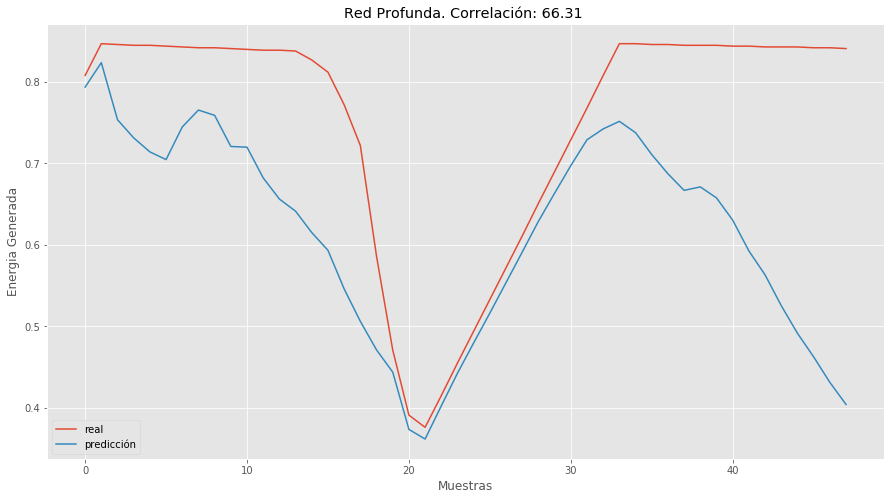

In [60]:
data_pred = pred_final_48
data_real = np.array(real)

corr = np.corrcoef(data_real, data_pred)

plt.plot(data_real, label ="real")
plt.plot(data_pred, label ="predicción")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Red Profunda. Correlación: %.2f " % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()